In [30]:
# run this immediately after starting the notebook
import os
os.chdir(r"C:\Users\jaiprakash yadav\retail-analysis")
print("CWD:", os.getcwd())

CWD: C:\Users\jaiprakash yadav\retail-analysis


In [10]:
# SET WORKING DIRECTORY TO PROJECT ROOT
import os
project_root = os.path.abspath("..")   # go up from /notebooks to /retail-analysis
os.chdir(project_root)

print("New working directory:", os.getcwd())
print("data folder exists?", os.path.exists("data"))

New working directory: c:\Users
data folder exists? False


In [3]:
# run only this tiny check
import os
print("cwd:", os.getcwd())
print("listing here:", os.listdir())
print("data exists here?:", os.path.exists("data"))

cwd: c:\Users\jaiprakash yadav\retail-analysis
listing here: ['.gitignore', 'data', 'notebooks', 'README.md', 'requirements.txt', 'scripts', 'venv']
data exists here?: True


In [4]:
import os
os.chdir("..")                # move up from notebooks to project root
print("cwd now:", os.getcwd())
print("listing now:", os.listdir())
print("data exists now?:", os.path.exists("data"))

cwd now: c:\Users\jaiprakash yadav
listing now: ['.ipython', '.matplotlib', '.ms-ad', '.vscode', 'ansel', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'machine_learning', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{88cc7060-832a-11f0-ad66-50fe0c15b569}.TM.blf', 'NTUSER.DAT{88cc7060-832a-11f0-ad66-50fe0c15b569}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{88cc7060-832a-11f0-ad66-50fe0c15b569}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'retail-analysis', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Videos']
data exists now?: False


In [5]:
os.makedirs("data", exist_ok=True)
print("made data folder (or it already exists). now exists:", os.path.exists("data"))

made data folder (or it already exists). now exists: True


In [6]:
import pandas as pd, numpy as np
print("pandas", pd.__version__, "numpy", np.__version__)

pandas 2.3.3 numpy 2.3.5


In [14]:
# PART 1: setup & quick sample (run this only)
import random
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# reproducible
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----- configuration -----
n_rows = 1000            # full target (we won't generate all at once here)
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 12, 31)

product_catalog = [
    ("P001", "Classic T-Shirt", 199.0),
    ("P002", "Slim Jeans", 899.0),
    ("P003", "Running Shoes", 2499.0),
    ("P004", "Baseball Cap", 349.0),
    ("P005", "Hoodie", 1299.0),
    ("P006", "Socks (Pack)", 199.0),
    ("P007", "Formal Shirt", 799.0),
    ("P008", "Chinos", 999.0),
    ("P009", "Sunglasses", 599.0),
    ("P010", "Backpack", 1499.0),
]

store_ids = [f"S{str(i).zfill(2)}" for i in range(1, 11)]
suppliers = ["SupraSupply", "MetroGoods", "PrimeWare", "LocalDepot"]

def rand_date(start, end):
    delta = (end - start).days
    r = random.randint(0, delta)
    return start + timedelta(days=r)

# generate only 10 rows as a quick test
rows = []
for i in range(10):
    pid, pname, base_price = random.choice(product_catalog)
    price = round(base_price * np.random.uniform(0.9, 1.15), 2)
    qty = int(np.random.poisson(2) + 1)
    store = random.choice(store_ids)
    supplier = random.choice(suppliers)
    txn_date = rand_date(start_date, end_date)
    discount = round(np.random.choice([0, 0, 5, 10, 15]), 2)
    total = round(qty * price * (1 - discount/100), 2)
    stock_before = max(0, int(np.random.normal(50, 30)))
    reorder_flag = int(stock_before < 10)
    rows.append({
        "transaction_id": f"T{i+1:05d}",
        "date": txn_date.date().isoformat(),
        "store_id": store,
        "product_id": pid,
        "product_name": pname,
        "supplier": supplier,
        "unit_price": price,
        "quantity": qty,
        "discount_pct": discount,
        "total_value": total,
        "stock_before_txn": stock_before,
        "reorder_flag": reorder_flag
    })

df_sample = pd.DataFrame(rows)
print(df_sample.head(10).to_string(index=False))
print("\nSample rows:", len(df_sample))


transaction_id       date store_id product_id    product_name    supplier  unit_price  quantity  discount_pct  total_value  stock_before_txn  reorder_flag
        T00001 2024-09-07      S01       P002      Slim Jeans   PrimeWare      893.28         4             5      3394.46                47             0
        T00002 2025-11-23      S03       P004    Baseball Cap SupraSupply      343.22         2            15       583.47                22             0
        T00003 2024-02-02      S02       P009      Sunglasses  LocalDepot      684.34         3            15      1745.07                93             0
        T00004 2024-08-26      S02       P001 Classic T-Shirt  MetroGoods      179.45         1             5       170.48                96             0
        T00005 2025-07-28      S10       P009      Sunglasses SupraSupply      630.72         2             5      1198.37                54             0
        T00006 2024-08-13      S09       P004    Baseball Cap  LocalDe

In [12]:
# PART 2 — generate full dataset (1000 rows) and save to data folder

rows = []
for i in range(n_rows):
    pid, pname, base_price = random.choice(product_catalog)
    price = round(base_price * np.random.uniform(0.9, 1.15), 2)
    qty = int(np.random.poisson(2) + 1)
    store = random.choice(store_ids)
    supplier = random.choice(suppliers)
    txn_date = rand_date(start_date, end_date)
    discount = round(np.random.choice([0, 0, 5, 10, 15]), 2)
    total = round(qty * price * (1 - discount/100), 2)
    stock_before = max(0, int(np.random.normal(50, 30)))
    reorder_flag = int(stock_before < 10)

    rows.append({
        "transaction_id": f"T{i+1:05d}",
        "date": txn_date.date().isoformat(),
        "store_id": store,
        "product_id": pid,
        "product_name": pname,
        "supplier": supplier,
        "unit_price": price,
        "quantity": qty,
        "discount_pct": discount,
        "total_value": total,
        "stock_before_txn": stock_before,
        "reorder_flag": reorder_flag
    })

df_full = pd.DataFrame(rows)

df_full.to_csv("data/retail_dataset.csv", index=False)
print("Saved full dataset ✔")
print("Rows:", len(df_full))


OSError: Cannot save file into a non-existent directory: 'data'

In [13]:
import os
print("CWD:", os.getcwd())
print("Exists data/?", os.path.exists("data"))
print("List dir:", os.listdir())

CWD: c:\Users
Exists data/? False
List dir: ['All Users', 'Default', 'Default User', 'desktop.ini', 'jaiprakash yadav', 'Public']


In [15]:
import os
from pathlib import Path

# 1) set project root (change this if your project folder is somewhere else)
project_root = Path(r"C:\Users\jaiprakash yadav\retail-analysis")  # <- exact path to your project
os.chdir(project_root)

# 2) ensure data folder exists
data_dir = project_root / "data"
data_dir.mkdir(parents=True, exist_ok=True)

# 3) save (replace df_full with the variable name you used for the full DataFrame)
out_path = data_dir / "retail_dataset.csv"
try:
    df_full.to_csv(out_path, index=False)
    print("Saved dataset to:", out_path)
    print("Exists now?", out_path.exists())
except NameError:
    print("ERROR: DataFrame variable 'df_full' not found. Did you name it differently?")
except Exception as e:
    print("Save failed:", repr(e))

# 4) sanity check: print working dir and listing
print("Current working dir:", Path.cwd())
print("data folder contents:", list(data_dir)[:10])

Saved dataset to: C:\Users\jaiprakash yadav\retail-analysis\data\retail_dataset.csv
Exists now? True
Current working dir: C:\Users\jaiprakash yadav\retail-analysis


TypeError: 'WindowsPath' object is not iterable

In [16]:
from pathlib import Path
import pandas as pd

data_dir = Path(r"C:\Users\jaiprakash yadav\retail-analysis\data")

# correct way to list a Path's files
print("Data folder exists:", data_dir.exists())
print("Data folder contents:", [p.name for p in data_dir.iterdir()])

# load and show sample
csv_path = data_dir / "retail_dataset.csv"
df = pd.read_csv(csv_path)
print("\nLoaded:", csv_path)
print("Rows, cols:", df.shape)
print("\nHead (5 rows):")
print(df.head().to_string(index=False))

# quick summary
print("\nBasic describe() for numeric columns:")
print(df.describe().round(2))


Data folder exists: True
Data folder contents: ['retail_dataset.csv']

Loaded: C:\Users\jaiprakash yadav\retail-analysis\data\retail_dataset.csv
Rows, cols: (1000, 12)

Head (5 rows):
transaction_id       date store_id product_id    product_name    supplier  unit_price  quantity  discount_pct  total_value  stock_before_txn  reorder_flag
        T00001 2024-06-14      S04       P005          Hoodie  MetroGoods     1283.93         3            15      3274.02                41             0
        T00002 2024-03-29      S09       P007    Formal Shirt  MetroGoods      850.88         1            10       765.79                33             0
        T00003 2024-07-27      S01       P010        Backpack SupraSupply     1394.03         2            10      2509.25                73             0
        T00004 2025-01-03      S03       P001 Classic T-Shirt SupraSupply      192.90         4             5       733.02                66             0
        T00005 2024-12-14      S10       

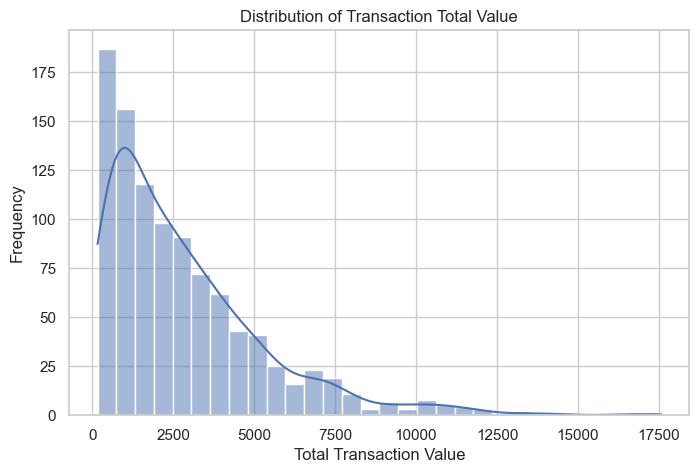

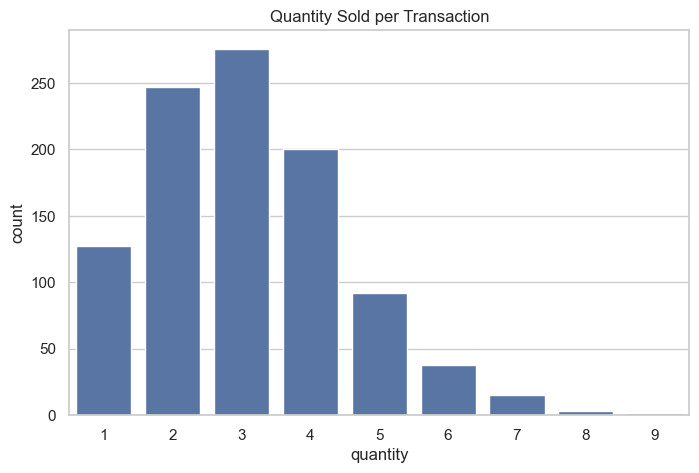

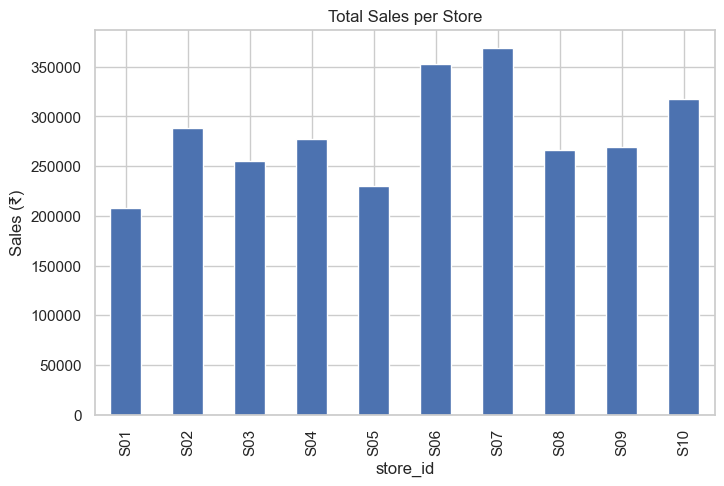

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring charts display nicely
sns.set(style="whitegrid")

# 1 — Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['total_value'], bins=30, kde=True)
plt.title("Distribution of Transaction Total Value")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()

# 2 — Quantity per transaction
plt.figure(figsize=(8,5))
sns.countplot(x=df["quantity"])
plt.title("Quantity Sold per Transaction")
plt.show()

# 3 — Average sales per store
store_sales = df.groupby("store_id")["total_value"].sum().sort_index()

plt.figure(figsize=(8,5))
store_sales.plot(kind="bar")
plt.title("Total Sales per Store")
plt.ylabel("Sales (₹)")
plt.show()


In [22]:
import pandas as pd

df = pd.read_csv("data\retail_dataset.csv")

print("Rows, Columns:", df.shape)
print("\nColumn Names:", df.columns.tolist())

df.head()

OSError: [Errno 22] Invalid argument: 'data\retail_dataset.csv'

In [23]:
import os
print("CWD:", os.getcwd())
print("Exists data/?", os.path.exists("data"))
print("Exists ../data/?", os.path.exists("../data"))
print("Exists ../../data/?", os.path.exists("../../data"))

CWD: C:\Users\jaiprakash yadav\retail-analysis
Exists data/? True
Exists ../data/? True
Exists ../../data/? False


In [24]:
# 1) load dataset (use project-relative path)
from pathlib import Path
data_path = Path("data") / "retail_dataset.csv"
print("File exists:", data_path.exists(), "->", data_path.resolve())

import pandas as pd
df = pd.read_csv(data_path)
print("Loaded:", data_path)
print("Shape:", df.shape)

File exists: True -> C:\Users\jaiprakash yadav\retail-analysis\data\retail_dataset.csv
Loaded: data\retail_dataset.csv
Shape: (1000, 12)


In [25]:
# 2) quick preview
print("Columns:", df.columns.tolist())
display(df.head(6))

Columns: ['transaction_id', 'date', 'store_id', 'product_id', 'product_name', 'supplier', 'unit_price', 'quantity', 'discount_pct', 'total_value', 'stock_before_txn', 'reorder_flag']


,transaction_id,date,store_id,product_id,product_name,supplier,unit_price,quantity,discount_pct,total_value,stock_before_txn,reorder_flag
0,T00001,2024-06-14,S04,P005,Hoodie,MetroGoods,1283.93,3,15,3274.02,41,0
1,T00002,2024-03-29,S09,P007,Formal Shirt,MetroGoods,850.88,1,10,765.79,33,0
2,T00003,2024-07-27,S01,P010,Backpack,SupraSupply,1394.03,2,10,2509.25,73,0
3,T00004,2025-01-03,S03,P001,Classic T-Shirt,SupraSupply,192.90,4,5,733.02,66,0
4,T00005,2024-12-14,S10,P007,Formal Shirt,SupraSupply,780.18,2,0,1560.36,46,0
5,T00006,2024-07-13,S09,P003,Running Shoes,LocalDepot,2396.04,2,0,4792.08,10,0


In [26]:
# 3) numeric summary
display(df.describe().round(2))

,unit_price,quantity,discount_pct,total_value,stock_before_txn,reorder_flag
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,979.80,3.08,6.20,2830.37,50.60,0.08
std,691.84,1.43,5.86,2498.65,28.99,0.28
min,179.18,1.00,0.00,164.36,0.00,0.00
25%,366.54,2.00,0.00,943.47,30.00,0.00
50%,891.65,3.00,5.00,2170.30,49.00,0.00
75%,1358.94,4.00,10.00,3901.31,69.00,0.00
max,2870.20,9.00,15.00,17570.56,140.00,1.00


In [27]:
# 4) top products by total sales
prod_sales = df.groupby("product_name", as_index=False)["total_value"].sum().sort_values("total_value", ascending=False)
display(prod_sales.head(8))

,product_name,total_value
6,Running Shoes,758979.49
0,Backpack,470572.23
5,Hoodie,386022.97
2,Chinos,366387.64
7,Slim Jeans,240852.74
4,Formal Shirt,224522.39
9,Sunglasses,169253.84
1,Baseball Cap,105073.20


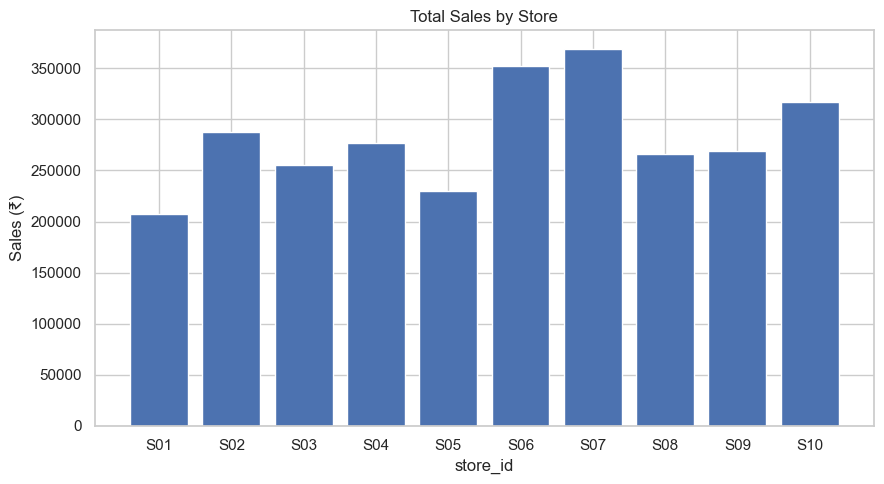

In [28]:
# 5) visual: sales by store
import matplotlib.pyplot as plt

store_sales = df.groupby("store_id", as_index=False)["total_value"].sum().sort_values("store_id")
plt.figure(figsize=(9,5))
plt.bar(store_sales["store_id"], store_sales["total_value"])
plt.xlabel("store_id")
plt.ylabel("Sales (₹)")
plt.title("Total Sales by Store")
plt.tight_layout()
plt.show()

In [29]:
# 6) write a small sample if you want to export
sample_path = Path("data") / "retail_sample_50.csv"
df.sample(50, random_state=42).to_csv(sample_path, index=False)
print("Saved sample:", sample_path)

Saved sample: data\retail_sample_50.csv


In [31]:
# DATA CLEANING & QUICK CHECKS (run in one cell)
import pandas as pd
from pathlib import Path
pd.options.display.max_rows = 20
pd.options.display.width = 120

data_path = Path("data") / "retail_dataset.csv"
df = pd.read_csv(data_path)

# 1) dtypes & parse date
print("Before parsing types:\n", df.dtypes, "\n")
df['date'] = pd.to_datetime(df['date'], errors='coerce')   # coerce invalid -> NaT
print("After parsing 'date':\n", df.dtypes, "\n")

# 2) missing values summary
print("Missing values (per column):")
print(df.isna().sum())
print()

# 3) duplicates
dupes = df.duplicated().sum()
print("Duplicate rows (exact):", dupes)

# 4) basic validation checks (suspicious rows)
conds = {
    "zero_or_negative_total": df['total_value'] <= 0,
    "large_quantity": df['quantity'] > 20,
    "negative_price": df['unit_price'] <= 0,
    "missing_date": df['date'].isna()
}
for name, cond in conds.items():
    cnt = cond.sum()
    print(f"{name}: {cnt}")

# 5) show top 10 suspicious rows (any condition holds)
suspect_mask = conds['zero_or_negative_total'] | conds['large_quantity'] | conds['negative_price'] | conds['missing_date']
if suspect_mask.any():
    print("\nSample suspicious rows:")
    display(df[suspect_mask].head(10))
else:
    print("\nNo suspicious rows found by these checks.")

# 6) ensure numeric columns are numeric
for c in ['unit_price','quantity','discount_pct','total_value','stock_before_txn','reorder_flag']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

print("\nFinal dtypes:")
print(df.dtypes)

# keep df in memory for next steps
df_clean = df.copy()
print("\nDone. df_clean ready (rows,cols):", df_clean.shape)


Before parsing types:
 transaction_id       object
date                 object
store_id             object
product_id           object
product_name         object
supplier             object
unit_price          float64
quantity              int64
discount_pct          int64
total_value         float64
stock_before_txn      int64
reorder_flag          int64
dtype: object 

After parsing 'date':
 transaction_id              object
date                datetime64[ns]
store_id                    object
product_id                  object
product_name                object
supplier                    object
unit_price                 float64
quantity                     int64
discount_pct                 int64
total_value                float64
stock_before_txn             int64
reorder_flag                 int64
dtype: object 

Missing values (per column):
transaction_id      0
date                0
store_id            0
product_id          0
product_name        0
supplier            0
unit_

In [32]:
# STEP 2 — HIGH LEVEL KPIs

df = df_clean.copy()

total_revenue = df['total_value'].sum()
total_qty = df['quantity'].sum()
aov = df['total_value'].mean()
unique_products = df['product_id'].nunique()
unique_stores = df['store_id'].nunique()
total_transactions = len(df)

print("===== HIGH LEVEL KPIs =====")
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Quantity Sold: {total_qty}")
print(f"Average Order Value (AOV): ₹{aov:,.2f}")
print(f"Unique Products: {unique_products}")
print(f"Unique Stores: {unique_stores}")
print(f"Total Transactions: {total_transactions}")

===== HIGH LEVEL KPIs =====
Total Revenue: ₹2,830,370.27
Total Quantity Sold: 3084
Average Order Value (AOV): ₹2,830.37
Unique Products: 10
Unique Stores: 10
Total Transactions: 1000


=== Store-wise Revenue (Descending) ===
store_id
S07    368653.08
S06    352366.76
S10    317446.38
S02    287900.91
S04    276844.84
S09    268975.45
S08    265656.77
S03    255064.71
S05    229553.97
S01    207907.40
Name: total_value, dtype: float64


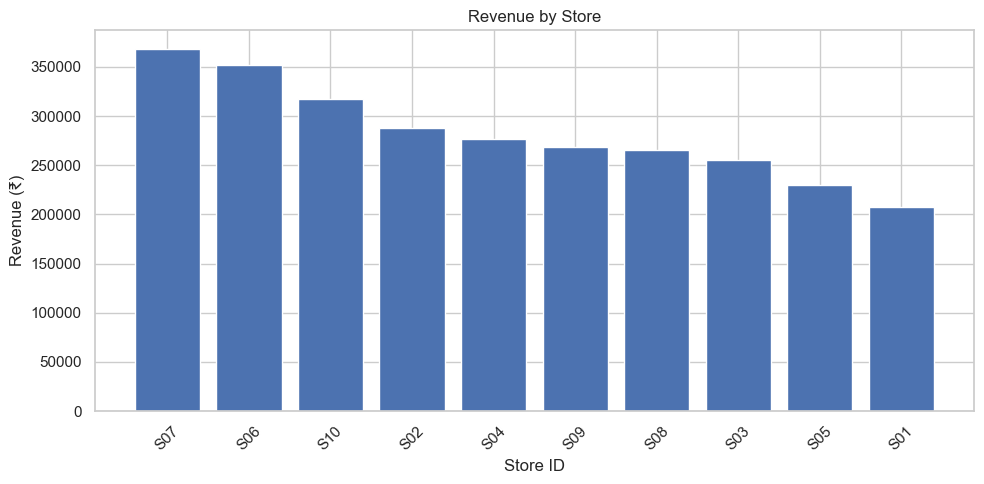

In [33]:
# STEP 3 — STORE-WISE REVENUE ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

store_rev = (
    df_clean.groupby("store_id")["total_value"]
    .sum()
    .sort_values(ascending=False)
)

print("=== Store-wise Revenue (Descending) ===")
print(store_rev)

# Plot
plt.figure(figsize=(10,5))
plt.bar(store_rev.index, store_rev.values)
plt.title("Revenue by Store")
plt.xlabel("Store ID")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
